# Feature importance and partial dependence plots for ensemble learning models

created by De-Cheng Feng, Wen-Jie Wang, Sujith Mangalathu and Gang Hu

data provided by Tao Wu

In [1]:
# define some necessary packages
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from openpyxl import load_workbook

dataset = pd.read_excel('deep_beam.xlsx', engine='openpyxl')
dataset.info()

X = dataset.loc[:, dataset.columns != 'Vu']
y = dataset['Vu']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fc      272 non-null    float64
 1   b       272 non-null    float64
 2   h       272 non-null    float64
 3   a       272 non-null    float64
 4   h0      272 non-null    float64
 5   l0      272 non-null    float64
 6   a/h0    272 non-null    float64
 7   l0/h    272 non-null    float64
 8   sv      272 non-null    float64
 9   fyv     272 non-null    float64
 10  rho_v   272 non-null    float64
 11  sh      272 non-null    float64
 12  fyh     272 non-null    float64
 13  rho_h   272 non-null    float64
 14  fy      272 non-null    float64
 15  rho_y   272 non-null    float64
 16  Vu      272 non-null    float64
dtypes: float64(17)
memory usage: 36.2 KB


In [3]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = xgb.XGBRegressor(max_depth=8, learning_rate=0.02, n_estimators=600, colsample_bytree=1, subsample=0.69,  gamma=0, random_state=0)
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.69,
             tree_method=None, validate_parameters=False, verbosity=None)

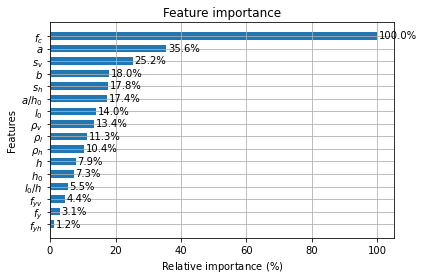

In [4]:
from sklearn.inspection import permutation_importance

feature_names = [r'$f_c$', r'$b$', r'$h$', r'$a$', r'$h_0$', r'$l_0$', r'$a/h_0$',
                 r'$l_0/h$', r'$s_v$', r'$f_{yv}$', r'$\rho_v$', r'$s_h$', r'$f_{yh}$',
                 r'$\rho_h$', r'$f_y$', r'$\rho_l$']

model.importance_type = 'weight'
feature_importance = model.feature_importances_

plt.figure()

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh (pos, feature_importance[sorted_idx], 0.6, align='center',)
plt.yticks(pos, np.array(feature_names)[sorted_idx], style='italic')
plt.yticks(rotation=360)

for x, y in enumerate(feature_importance[sorted_idx]):
	plt.text(y + 0.5, x + 0.3, '%s' % '{:.1%}'.format(y/100))

plt.xlabel('Relative importance ($\%$)')
plt.ylabel('Features')
plt.title('Feature importance')
plt.grid()
plt.tight_layout()

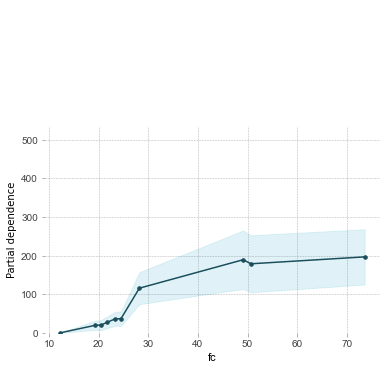

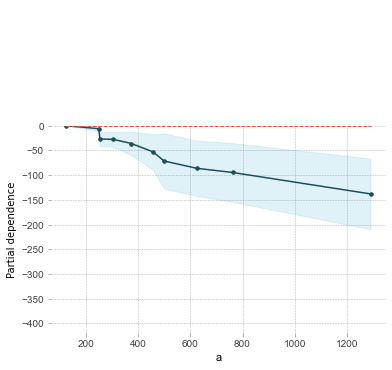

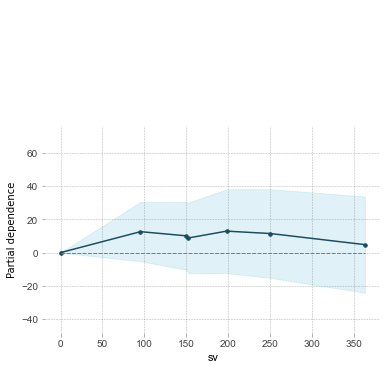

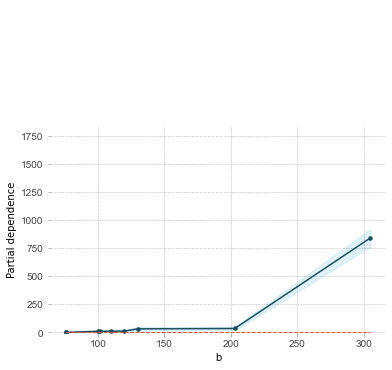

In [5]:
from pdpbox import pdp

x = ['fc','b','h','a','h0','l0','a/h0','l0/h','sv','fyv','rho_v','sh','fyh','rho_h','fy','rho_y']

feature = 'fc'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.ylabel('Partial dependence')

feature = 'a'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.ylabel('Partial dependence')

feature = 'sv'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.ylabel('Partial dependence')

feature = 'b'
pdp_goals = pdp.pdp_isolate(model = model, dataset = X_train, model_features = x, feature = feature)
pdp.pdp_plot(pdp_goals, feature, figsize=(6.0, 6.0), plot_params = {'title': None, 'subtitle': None})
plt.ylabel('Partial dependence')

plt.show()